The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

1. Analysis that highlights your experimental hypothesis.
2. A rollout plan showing how you would implement and rollout the experiment
3. An evaluation plan showing what constitutes success in this experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [2]:
#https://data.world/citibikenyc/citibike-tripdata-january-2018
df = pd.read_csv('201801-citibike-tripdata.csv')

# 1=male 2=female 0=unknown
# User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)

In [3]:
#dfos = df[df['tripduration'] > 1800]
#dfo = dfos[dfos['usertype'] == 'Customer']
#dfo
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,196,2018-01-01 00:01:51,2018-01-01 00:05:07,315,South St & Gouverneur Ln,40.703554,-74.006702,259,South St & Whitehall St,40.701221,-74.012342,18534,Subscriber,1997.0,1
1,207,2018-01-01 00:02:44,2018-01-01 00:06:11,3224,W 13 St & Hudson St,40.739974,-74.005139,470,W 20 St & 8 Ave,40.743453,-74.000040,19651,Subscriber,1978.0,1
2,613,2018-01-01 00:03:15,2018-01-01 00:13:28,386,Centre St & Worth St,40.714948,-74.002345,2008,Little West St & 1 Pl,40.705693,-74.016777,21678,Subscriber,1982.0,1
3,375,2018-01-01 00:06:44,2018-01-01 00:12:59,466,W 25 St & 6 Ave,40.743954,-73.991449,325,E 19 St & 3 Ave,40.736245,-73.984738,29822,Subscriber,1982.0,1
4,402,2018-01-01 00:06:57,2018-01-01 00:13:40,438,St Marks Pl & 1 Ave,40.727791,-73.985649,380,W 4 St & 7 Ave S,40.734011,-74.002939,30722,Subscriber,1989.0,1


In [4]:
#df2 = df
#df2 = pd.to_datetime(df.starttime)
#df.starttime = pd.to_datetime(df.starttime)
#df.dtypes

In [5]:
#df2.starttime = pd.to_datetime(df2.starttime).dt.floor('d')

In [6]:
#df2.index = pd.to_datetime(df2.index, unit='s')

In [7]:
#by_day = df2.starttime.groupby(pd.Grouper(freq='M'))
#avg_dur_by_day = df2.tripduration.agg(np.mean)

User Type (Customer = single ride, 24-hour pass or 3-day pass user; Subscriber = Annual Member)

# START HERE

"Citi Bike is a privately owned public bicycle sharing system serving the New York City boroughs of Manhattan, Queens, and Brooklyn, as well as Jersey City, New Jersey." (https://en.wikipedia.org/wiki/Citi_Bike).

The company has been quite successful since its May 2013 opening, expanding from 332 stations and 6,000 bikes to 706 stations and 12,000 bikes as of October 2017.

The dataset I'm using, from January 2018, reflects these numbers relatively closely.

In [8]:
print('Number of Bikes:    ', df.bikeid.nunique())
print('Number of Stations: ', df['start station id'].nunique())

Number of Bikes:     10448
Number of Stations:  763


To put things simply, Citi Bike's success is based on how frequently and how long its bikes are ridden. 

__The purpose of this experiment is to see if improvements to certain bikes will increase the frequency and/or duration that they are ridden.__

As a secondary metric, we can see if an increase in total Citi Bike rides has a resulting impact on other local means of transportation such as taxis or ride sharing. 

These changes can benefit the company and potentially benefit the environment if more bikes are being used as opposed to polluting transportation methods.

There are two categories of riders in this database in terms of payment styles, 'Customer' and 'Subscriber'. In the case of this experiment, I have decided to only take into account the riding habits of 'Customers'. The reasoning is as follows:

Subscribers pay an annual membership fee of \\$169/year and get unlimited rides up to 45 minutes each, with a charge of \\$2.50 per each additional 15 minutes over 45. 

Customers typically opt for a single ride at \\$3/ride up to 30mins, or a day pass at \\$12/day for unlimited rides for a 24-hour period, with a charge of \\$4 per each additional 15 minutes over 30.

This means that for most cases, trip frequency and duration do not matter when it comes to Subscribers (only 3653 Subscriber trips out of 696894 recorded in this dataset exceeded 45 minutes).

Meanwhile, 7677 Customer trips out of 22090 recorded exceeded 30 minutes, which is a far greater ratio than that of the Subscribers.

As we can see, customer trips that exceed duration outnumber that of subscribers even though there are far greater subscriber trips in total.

In [9]:
dfs = df[df.usertype == 'Subscriber']
dfsx = dfs[dfs.tripduration > 2700]
print('Subscriber Trips Exceeding 45min: ', len(dfsx.index))

print()

dfc = df[df.usertype == 'Customer']
dfcx = dfc[dfc.tripduration > 1500]
print('Customer Trips Exceeding 30min: ', len(dfcx.index))

print()

print('Total Trips by User Type: \n', df.usertype.value_counts())

Subscriber Trips Exceeding 45min:  3653

Customer Trips Exceeding 30min:  7677

Total Trips by User Type: 
 Subscriber    696894
Customer       22090
Name: usertype, dtype: int64


This may be surprising, but there must be reasons for this.

Subscribers likely use Citi Bikes for commuting, meaning they have fixed routes every trip.

Customers, on the other hand, are likely more often renting the bikes for fun/tourism since they are visiting the city, meaning they are more likely to go on longer rides throughout the city. 

This theory is reinforced by the following:

In [10]:
print('Mean Subscriber Trip Duration: ', df[df['usertype'] == 'Subscriber'].tripduration.mean())
print('Mean Customer Trip Duration:  ', df[df['usertype'] == 'Customer'].tripduration.mean())

Mean Subscriber Trip Duration:  690.7522004781215
Mean Customer Trip Duration:   2177.9059755545495


The point is, our end goal of increasing trip frequency and duration applies only to Citi Bike customers.

# EXPERIMENT

Now, onto the experiment:

Add upgrades to some bikes.

POSSIBLE UPGRADES:

1. Smart Halo https://www.amazon.com/SmartHalo-Accessory-Navigation-Anti-Theft-Speedometer/dp/B071WMZFFZ/ref=as_li_ss_tl?ie=UTF8&linkCode=sl1&tag=travgadg-20&linkId=a7a40618b96e6ab2ff2f2b472a2ec804&language=en_US

This gadget turns bikes into smartbikes. Guides you around via GPS, __tracks your fitness goals__, has an automatic night light and even has a personal assistant that can answer wuestions or take phone calls.
I believe the fitness tracking aspect alone will lead to longer and/or more frequent rides.

2. Attached Bluetooth Speaker (any). Example: https://www.amazon.com/Bluetooth-Speaker-System-Celtic-Blu/dp/B01LY6UKCL/ref=as_li_ss_tl?ie=UTF8&linkCode=sl1&tag=travgadg-20&linkId=2974c6a27ad05e05612d2a99839fa8fa&language=en_US

This will increase enjoyment on bike rides, especially for those without headphones or other means of listening to music while riding. Could potentially increase duration of bike rides.

3. Improved Seat Cushion (any) (cheap). Example: https://www.amazon.com/Zacro-Cover-BS031-Extra-Bicycle/dp/B01H71AZ36/ref=as_li_ss_tl?ie=UTF8&qid=1522178670&sr=8-19&keywords=bike+accessories&linkCode=sl1&tag=brobible-20&linkId=429446966a8fec33e28c7bb14ccb2eef

A more comfortable seat can definitely increase trip duration. From my own experience, Citi Bike seats are not the most comfortable and can leade to shorter trips when being ridden for leisure/tourism purposes.

4. Light System (any). Example: https://www.amazon.com/revolights-skyline-bicycle-lighting-27-inch/dp/b00o50tuse

Equipping bikes with lights will make night-riding more viable and therefore increase total trips.

__WRITE UP OUTLINE:__

Upgrade(s) will be added to select bikes throughout the city.

For 1-month experiment:

Ideally, 10% of bikes will be modified for first two weeks, then up to 50% for the next two weeks.

This will obviously vary based on budget.

In terms of tracking the data, a column will be added to determine if a certain bikeid had been modified, and a cost column will be added to track revenue of each trip, assuming each trip is a single ride (for simplicity & lack of specification within data) and accounting for overage penalties __DEMONSTRATED BELOW__

At the end of the experimentation period, revenue generated by trips with modified vs unmodified bikes (daily, weekly, etc) will be compared with a T-test.

A P-value greater than .05 will show that there is a significant increase in revenue generated by upgraded bikes.

For this experiment we will be testing Citi Bike upgrades in NYC in order to see if they have a positive effect on Citi Bike useage and therefore profits, as well as any resulting impact on other local means of transportation such as taxis or ride sharing. These changes can benefit the company and potentially benefit the environment if more bikes are being used as opposed to polluting transportation methods.

# DEMONSTRATIONS

### COST COLUMN

In [11]:
# limit = 1800s
# increments: 15m = 900s
#int(1800 / 900)

#if > 1800 

In [12]:
# PRICING FUNCTION
# #1
# Each trip assumed to be single ride = $3
# Every 15min over 30min is +4

def cust_price(d):
    x = d.tripduration
    if (x > 1800):
        x = int((x - 1800) / 900)
        y = x * 4 + 3
    else: 
        y = 3
    return y

df1 = df[df.usertype == 'Customer']
df2 = df1
df2['cost'] = df2.apply(cust_price, axis=1)

df2

c:\users\conno\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,cost
63,1242,2018-01-01 00:37:04,2018-01-01 00:57:46,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,16798,Customer,NaN,0,3
64,1267,2018-01-01 00:37:03,2018-01-01 00:58:11,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,16071,Customer,NaN,0,3
66,1223,2018-01-01 00:37:38,2018-01-01 00:58:01,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,30152,Customer,NaN,0,3
68,1145,2018-01-01 00:38:24,2018-01-01 00:57:30,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,28843,Customer,NaN,0,3
69,1272,2018-01-01 00:39:38,2018-01-01 01:00:50,524,W 43 St & 6 Ave,40.755273,-73.983169,440,E 45 St & 3 Ave,40.752554,-73.972826,28556,Customer,NaN,0,3
71,1288,2018-01-01 00:39:51,2018-01-01 01:01:20,524,W 43 St & 6 Ave,40.755273,-73.983169,440,E 45 St & 3 Ave,40.752554,-73.972826,15428,Customer,NaN,0,3
141,1062,2018-01-01 01:08:10,2018-01-01 01:25:53,3139,E 72 St & Park Ave,40.771183,-73.964094,3305,E 91 St & 2 Ave,40.781122,-73.949656,14647,Customer,NaN,0,3
142,2078,2018-01-01 01:08:23,2018-01-01 01:43:02,460,S 4 St & Wythe Ave,40.712859,-73.965903,3619,Newtown Ave & 23 St,40.771361,-73.924615,28396,Customer,NaN,0,3
258,773,2018-01-01 01:49:43,2018-01-01 02:02:36,3534,Frederick Douglass Blvd & W 117 St,40.805159,-73.954692,3553,Frederick Douglass Blvd & W 112 St,40.801694,-73.957145,25223,Customer,NaN,0,3
260,386,2018-01-01 01:51:23,2018-01-01 01:57:49,439,E 4 St & 2 Ave,40.726281,-73.989780,3263,Cooper Square & Astor Pl,40.729515,-73.990753,20122,Customer,NaN,0,3


### GROUP BY DAY

Group trips by day

In [13]:
# DAY GROUP
# ADDS DAY COLUMN
df2.starttime = pd.to_datetime(df2.starttime)
df2['day'] = df2.starttime.apply(lambda x: x.strftime("%d"))

c:\users\conno\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
c:\users\conno\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
df2.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,cost,day
63,1242,2018-01-01 00:37:04,2018-01-01 00:57:46,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,16798,Customer,NaN,0,3,01
64,1267,2018-01-01 00:37:03,2018-01-01 00:58:11,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,16071,Customer,NaN,0,3,01
66,1223,2018-01-01 00:37:38,2018-01-01 00:58:01,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,30152,Customer,NaN,0,3,01
68,1145,2018-01-01 00:38:24,2018-01-01 00:57:30,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,28843,Customer,NaN,0,3,01
69,1272,2018-01-01 00:39:38,2018-01-01 01:00:50,524,W 43 St & 6 Ave,40.755273,-73.983169,440,E 45 St & 3 Ave,40.752554,-73.972826,28556,Customer,NaN,0,3,01


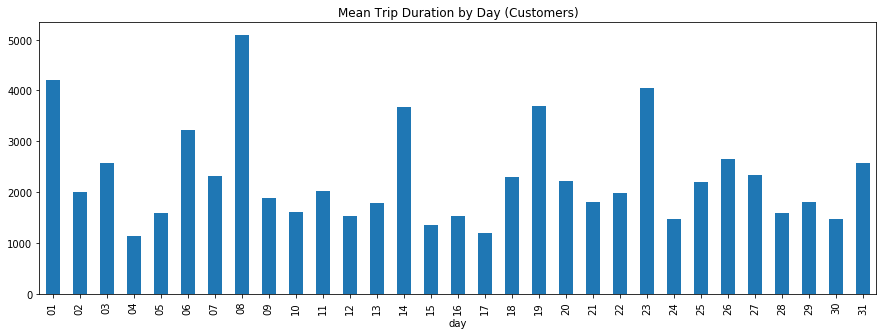

In [32]:
df2.groupby(['day']).tripduration.mean().plot(kind='bar', figsize=(15,5), linewidth=1, title='Mean Trip Duration by Day (Customers)')

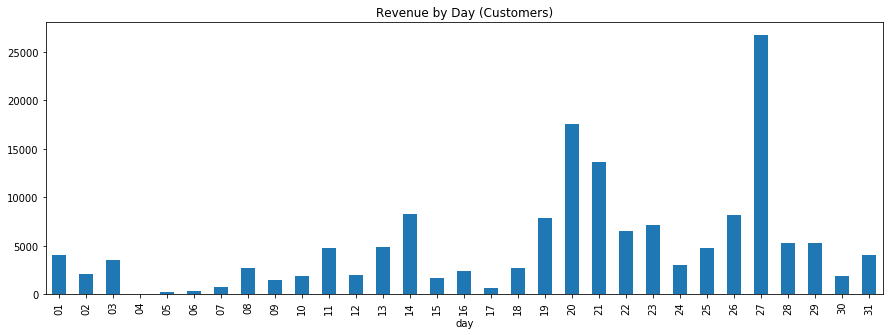

In [33]:
df2.groupby(['day']).cost.sum().plot(kind='bar', figsize=(15,5), linewidth=1, title='Revenue by Day (Customers)')

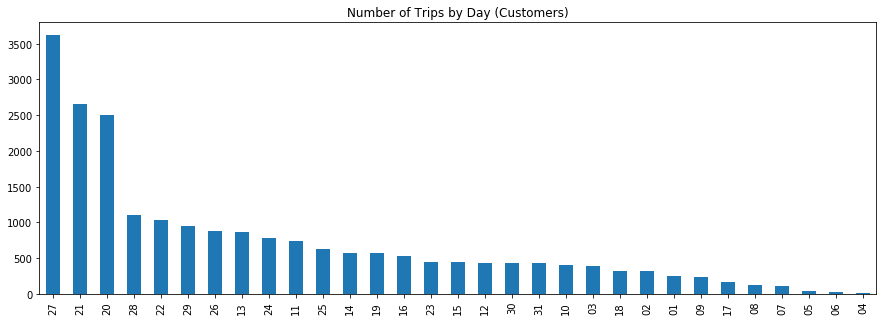

In [34]:
df2.day.value_counts().plot(kind='bar', figsize=(15,5), linewidth=1, title='Number of Trips by Day (Customers)')

In [19]:
#sns.relplot(dfd.day, dfd.day.value_counts(), kind='line', height=7)

### ADD MORE CHARTS (ANALYSIS ON RIDES BY AGE, GENDER, ETC.)

In [20]:
df2.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,cost,day
63,1242,2018-01-01 00:37:04,2018-01-01 00:57:46,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,16798,Customer,NaN,0,3,01
64,1267,2018-01-01 00:37:03,2018-01-01 00:58:11,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,16071,Customer,NaN,0,3,01
66,1223,2018-01-01 00:37:38,2018-01-01 00:58:01,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,30152,Customer,NaN,0,3,01
68,1145,2018-01-01 00:38:24,2018-01-01 00:57:30,2021,W 45 St & 8 Ave,40.759291,-73.988597,509,9 Ave & W 22 St,40.745497,-74.001971,28843,Customer,NaN,0,3,01
69,1272,2018-01-01 00:39:38,2018-01-01 01:00:50,524,W 43 St & 6 Ave,40.755273,-73.983169,440,E 45 St & 3 Ave,40.752554,-73.972826,28556,Customer,NaN,0,3,01


#### NOTE: DO EXAMPLE EXPERIMENT VS OLDER DATA

In [21]:
#sns.relplot(x='starttime', y='price', kind='line', height=7, data=df)

In [22]:
#sns.scatterplot(df.starttime, df.)

In [23]:
print('INFO:')
print()
print('Mean age: ', 2019 - df['birth year'].mean())
print()
print('Mean trip duration: ', df.tripduration.mean())
print()
print('Number of different bikes: ', df.bikeid.nunique())
print('Number of different stations: ', df['start station id'].nunique())
print()
print('User type: \n', df.usertype.value_counts())
print()
print('Total trips by gender: \n', df.gender.value_counts())
print()
print('Avg trip duration by gender:')
print('Male:    ', df[df.gender == 1].tripduration.mean())
print('Female:  ', df[df.gender == 2].tripduration.mean())
print('Unknown: ', df[df.gender == 0].tripduration.mean())
print()
print('Mean customer duration: ', df[df['usertype'] == 'Customer'].tripduration.mean())
print('Mean subscriber duration: ', df[df['usertype'] == 'Subscriber'].tripduration.mean())

INFO:

Mean age:  40.90320895210016

Mean trip duration:  736.443379824864

Number of different bikes:  10448
Number of different stations:  763

User type: 
 Subscriber    696894
Customer       22090
Name: usertype, dtype: int64

Total trips by gender: 
 1    537585
2    151804
0     29595
Name: gender, dtype: int64

Avg trip duration by gender:
Male:     674.657923863203
Female:   784.9132829174462
Unknown:  1610.1385707045108

Mean customer duration:  2177.9059755545495
Mean subscriber duration:  690.7522004781215


In [24]:
# mean trip duration
df.tripduration.mean()

736.443379824864

In [35]:
#sns.distplot(df.tripduration)

In [26]:
df.usertype.value_counts()

Subscriber    696894
Customer       22090
Name: usertype, dtype: int64

In [27]:
#male vs female avg trip time
print(df[df.gender == 1].tripduration.mean())
print(df[df.gender == 2].tripduration.mean())
print(df[df.gender == 0].tripduration.mean())

674.657923863203
784.9132829174462
1610.1385707045108


In [28]:
# #users by gender
# 1=male 2=female 0=unspecified
df.gender.value_counts()

1    537585
2    151804
0     29595
Name: gender, dtype: int64

In [29]:
# number of different bikes
df.bikeid.nunique()

10448

Citibike gets paid by duration of trip. Could try implementing, for example, comfier seats on certain bikes and see if trip duration increases.

Other features. Increase fun. Gps module. Appealing/practical.

2nd metric - see if there's an effect on other transportation methods: taxis, etc. to reduce pollution. - other positive effects.

Analyze frequency & duration. Improve

Normal use vs tourists.

TODO:

avg duration / hist duration

trip freq

normal vs tourist

trips vs time of month

trips/duration by gender